### EXPLORATORY DATA ANALYSIS 

In this notebook we are going to make a deep analysis to understand customer behaviors and market tendencies. We will start by understanding the data distribution and missing values and then dive deeper in more particular anlaysis. 

In [2]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

#### BASIC ANALYSIS

We have available 6 diferent files:

- products.csv : we have product id and the product name for each product available in instacart and the aisle id and department id.
- aisles.csv : we have aisle id and aisle name for each aisle available in instacart.
- departments.csv : we have department id and department name for each department available in instacart. 
- orders.csv : we have details about every order made.
- order_products_prior.csv : we have all the orders made by 206,209 customers and the product id for each product ordered.  
- order_products_train.csv : we have the last order for 131,209 customers.

In order to have a better understanding of the data we have created 6 dataframes corresponding to the 6 files:


In [3]:
df_product = pd.read_csv('./instacart-market-basket-analysis/products.csv')
df_aisles = pd.read_csv('./instacart-market-basket-analysis/aisles.csv')
df_departments = pd.read_csv('./instacart-market-basket-analysis/departments.csv')
df_order_products_prior= pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')
df_order_products_train= pd.read_csv('./instacart-market-basket-analysis/order_products__train.csv')
df_orders=pd.read_csv('./instacart-market-basket-analysis/orders.csv')

To simplify, we joined the products related tables (df_product, df_aisles, df_departments) in one single table called final_products.

In [4]:
final_products = df_product.merge(df_aisles, on='aisle_id',how='outer').merge(df_departments, on='department_id', how='outer')
final_products = final_products[['product_id','product_name','aisle_id','aisle','department_id','department']]

We also joined the df_order_products_prior and df_order_products_train with the final product table in order to have information about the products ordered we have called these dataframes df_order_products_prior_complete and df_order_products_train_complete

In [5]:
df_order_products_prior_complete = pd.merge(df_order_products_prior, final_products, on='product_id', how='left')

df_order_products_train_complete = pd.merge(df_order_products_train, final_products, on='product_id', how='left')

#### Products 

In this section we will analyse the **final products dataframe** (merge of the product, aisle and departments dataframes)

In [6]:
final_products.nunique()

product_id       49688
product_name     49688
aisle_id           134
aisle              134
department_id       21
department          21
dtype: int64

There are 49688 unique products, 134 unique aisles and 21 unique departments in our database. We want to know if there are missing values or nan values in the product table, therefore we use the info function to answer to that question:

In [7]:
final_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   aisle          49688 non-null  object
 4   department_id  49688 non-null  int64 
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


We can conclude that there are no missing values in the final product table. We will repeat this analysis for all the dataframes in the project.

#### Orders 

In this section we will analyse the **order related** dataframes (df_orders, df_order_products_prior, df_order_products_train)

In [8]:
df_orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In this database we have **3,421,083 orders** from **206,209 customers**. The maximum number of orders from the same customer is 100. We can also observe that the df_orders table has information about the three sets: prior, train, test (eval_set column). 

In [9]:
df_orders.describe()

order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.500000e+01  
max         2.300000e+01            3.000000e+01

In this table we can underline several important values such as the **mean number of order number being equal to 17** meaning that on average each customer makes 17 orders. The **mean order_hour_o_day equal to 13** meaning that most of the orders are made at 13h and the **mean order_dow (order day of the week) being equal to 2.7** meaning that on average orders are made between Tuesday and Wednesday.

Now, we are are going to see if there are any **missing values**:

In [10]:
df_orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

We can conclude that the only column with missing values is **days_since_prior_order with 206,209 rows with null value**. 

If we dive a little bit deeper in this aspect we can understand the reason for having null values 206,209 times (which is the number of customers that there exist in the database).Every first order of each client has a nan value in the days_since_prior_order column meaning that it is not applicable. For that reason only the df_order_products_prior has null values, the df_order_products_train (being the table that records the last order of 131,209 customers) don't have null values. 

In [11]:
df_orders[df_orders['days_since_prior_order'].isna()].head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    2539329        1    prior             1          2                  8   
11   2168274        2    prior             1          2                 11   
26   1374495        3    prior             1          1                 14   
39   3343014        4    prior             1          6                 11   
45   2717275        5    prior             1          3                 12   

    days_since_prior_order  
0                      NaN  
11                     NaN  
26                     NaN  
39                     NaN  
45                     NaN

In [12]:
#All first order of each client have nan in the days_since_prior_order column
df_orders[df_orders['order_number']==1].head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    2539329        1    prior             1          2                  8   
11   2168274        2    prior             1          2                 11   
26   1374495        3    prior             1          1                 14   
39   3343014        4    prior             1          6                 11   
45   2717275        5    prior             1          3                 12   

    days_since_prior_order  
0                      NaN  
11                     NaN  
26                     NaN  
39                     NaN  
45                     NaN

Now we will analyse the **df_order_products_prior** dataframe:

In [13]:
df_order_products_prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In this table we have 4 columns as seen above. The add_to_cart_order represents the order in which the client selects his products, and the reordered column represents if the product was or not reordered in the past (is a binomial column: 1 -> reorderes and 0 -> not reordered). 

In [14]:
df_order_products_prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [15]:
df_order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [16]:
df_order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

All these columns are int64 type and there are no null values in it.

The last analysis concerning orders is the one concerning the dataframe df_order_products_train. This table contains information, as said befora, from 131,209 customers. It has 4 columns, the same as in the df_order_products_prior table. 

In [17]:
df_order_products_train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

As observed initially the total amount of products present in the database is 49,688, as we can see in the df_order_products_train dataframe there are only 39,123, meaning that there are 10,565 products that are not represented in this table. 

We just finished the basic analysis section, we will continue analyzing the data in a more detailed way in the next section.

#### DEEP ANALYSIS

This analysis will be focused on df_orders, df_order_products_train and df_order_products_prior dataframes.

We want to understand the behavior of the clients, what is the day where there are more orders at what time? Is the day related with the hour? How many days since the prior order? Is there any pattern? 

These are the questions that we are going to try to answer in this section in order to understand the customers' behavior.

In [18]:
pd.set_option('display.max_columns', None)
df_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

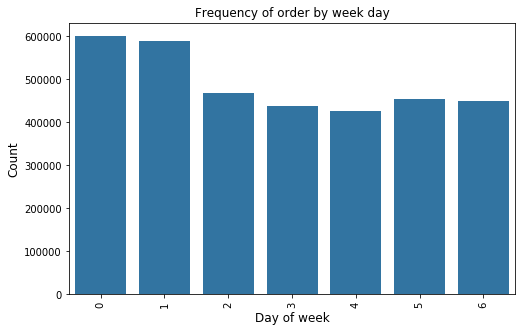

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="order_dow", data=df_orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=12)
plt.show()

By observing this graph we can understand that most orders occur on day 0 and 1, we don't know which day represent each number, but we would assume that this is the weekend. So most customers go shopping on the weekend. Is there a time of day with greater adherence?

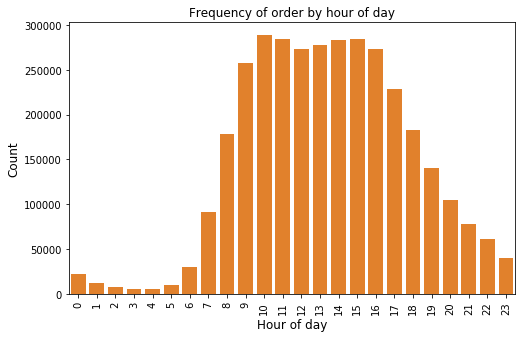

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="order_hour_of_day", data=df_orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=12)
plt.show()

In fact during the day instacart is busier, more specifically between 10am and 15pm. Now let us combine the day of week and hour of day to see the distribution.

In [21]:
grouped_df = df_orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

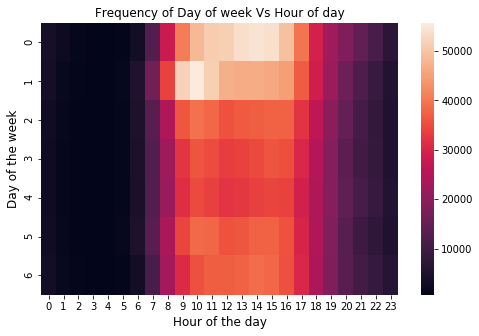

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.ylabel('Day of the week', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.show()

It seems that saturday from 13 to 15 and on sunday from 9 to 11 is the prime time.

From this small analysis we are starting to understand our customers behavior, they **prefer to go shopping in the morning during the weekend**. Now we want to understand if there is any pattern in the days since prior order.

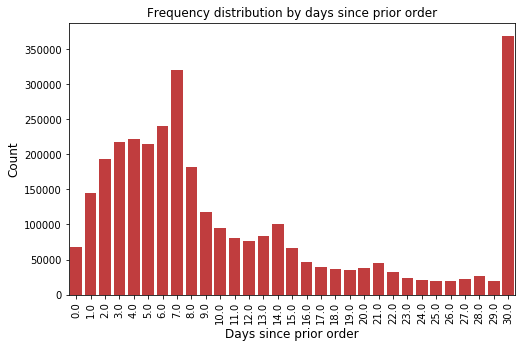

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="days_since_prior_order", data=df_orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=12)
plt.show()

Looks like our customers order once in every week (represented by the peak at 7 days) or once in a month (represented by the peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (that represents weekly intervals).

We are now seeing how is the number of orders by each customer distributed.

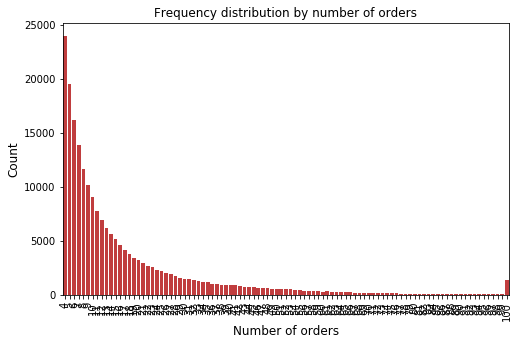

In [24]:
max_num = df_orders.groupby('user_id')['order_number'].max().to_frame().reset_index().sort_values(by='order_number',ascending=False)
plt.figure(figsize=(8,5))
sns.countplot(x="order_number", data=max_num, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of orders', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by number of orders", fontsize=12)
plt.show()

We can conclude by observing the graph above that most customers order less than 10 times. It is easier to visualize this when represented in a boxplot.

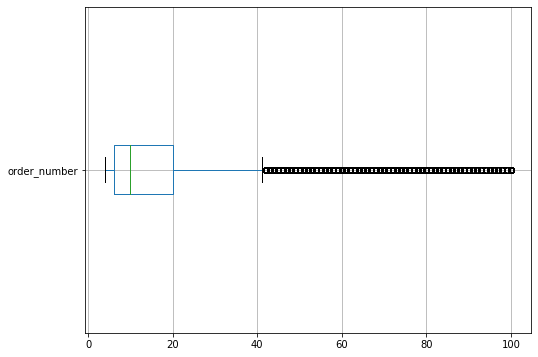

In [25]:
max_num.boxplot(column=['order_number'], vert=False, figsize=(8, 6))

In this boxplot we can see that in fact 50% of the customers order less than 10 times, but is also possible to see that there are many outliers after 40 times.

**In conclusion:**

Most of our customers make orders in the weekend in the morning, and they tend to shop in a weekly basis. We know also that half of our customers have less than 10 orders withinstacart.

**Basket analysis**

We are know going to analye their shopping preferences. What product do they buy the most? What is the department and the aisle with most orders? What is the mean size of their orders? 

What are the products within more orders?

In [26]:
prod_freq = df_order_products_prior_complete['product_name'].value_counts().reset_index().head(20)
prod_freq.columns = ['product_name', 'frequency_count']
prod_freq

product_name  frequency_count
0                     Banana           472565
1     Bag of Organic Bananas           379450
2       Organic Strawberries           264683
3       Organic Baby Spinach           241921
4       Organic Hass Avocado           213584
5            Organic Avocado           176815
6                Large Lemon           152657
7               Strawberries           142951
8                      Limes           140627
9         Organic Whole Milk           137905
10       Organic Raspberries           137057
11      Organic Yellow Onion           113426
12            Organic Garlic           109778
13          Organic Zucchini           104823
14       Organic Blueberries           100060
15            Cucumber Kirby            97315
16        Organic Fuji Apple            89632
17             Organic Lemon            87746
18  Apple Honeycrisp Organic            85020
19    Organic Grape Tomatoes            84255

Most of our customers have healthy habits. The products with more frequency (meaning that they are more ordered) are Banana, Bag of Organic Bananas and Organic Strawberries. What about the aisle and the department with more visits?

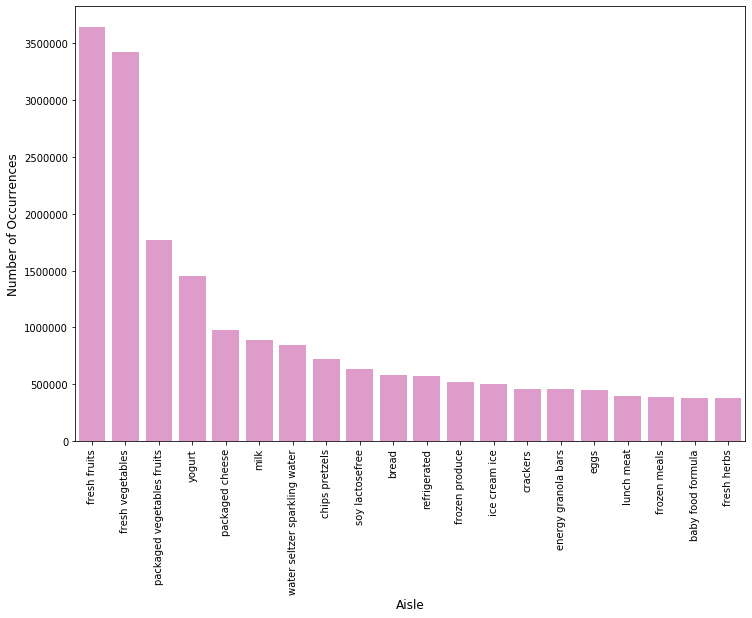

In [27]:
aisle_freq = df_order_products_prior_complete['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x = aisle_freq.index, y= aisle_freq.values, alpha=0.8, color=color[6])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top 3 aisles with more orders are: fresh fruits, fresh vegetables and packaged vegetables fruits.

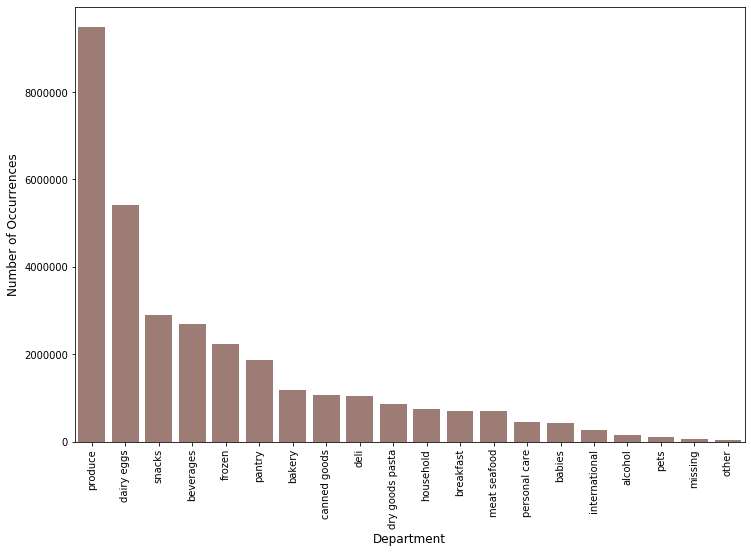

In [28]:
dep_freq = df_order_products_prior_complete['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x = dep_freq.index, y = dep_freq.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top 3 departments with more orders are: produce, dairy eggs and snack.

By these analysis we can see that the porduct being organic or not organic can, in fact, have some consequences in the order number.  

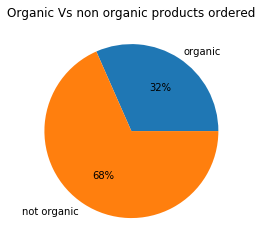

In [29]:
organic = df_order_products_prior_complete['product_name'].str.contains(r'Organic').sum()
non_organic = df_order_products_prior_complete['product_name'].count() - organic

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie([organic,non_organic], labels = ['organic','not organic'], autopct='%.0f%%')
plt.title('Organic Vs non organic products ordered')
plt.show()

This seems like an important aspect of the products. We will create a variable with this information. 

In [30]:
organic_df = pd.DataFrame({'type':['organic','Non_organic'], 'Count':[organic,non_organic]})
df_order_products_prior_complete['is_organic'] = np.where(df_order_products_prior_complete['product_name'].str.contains(r'Organic'), 'yes', 'no')

**In conclusion:**

Our customers buy mostly non organic products.

**Reordered analysis**

Since our **objective** is to **find which products are more likely to be reordered**, we are now going to focus our analysis in that variable.

How is the reordered percentage distributed in the departments? and in the aisles? 

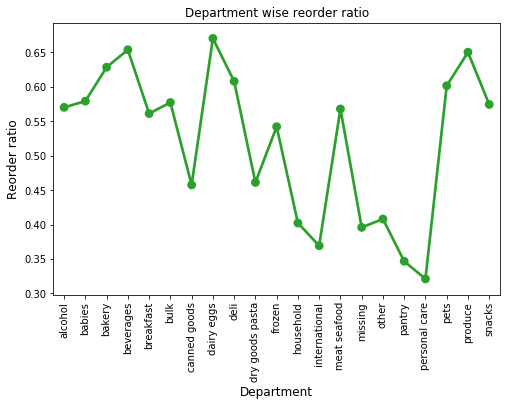

In [31]:
grouped_df = df_order_products_prior_complete.groupby(["department"])["reordered"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.pointplot(x = grouped_df['department'].values, y= grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
reordered = df_order_products_prior_complete.groupby(['aisle'])['reordered'].agg(['count','sum']).reset_index()

reordered.rename(columns = {'count':'total','sum':'reordered'}, inplace = True)

reordered['reordered_ratio'] = reordered['reordered'] / reordered['total'] 
reordered.sort_values(by='reordered_ratio', ascending = False, inplace = True)

In [33]:
top20_aisles = reordered.head(20)
bot20_aisles = reordered.tail(20).sort_values(by = 'reordered_ratio')

/Users/margaridapintobasto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


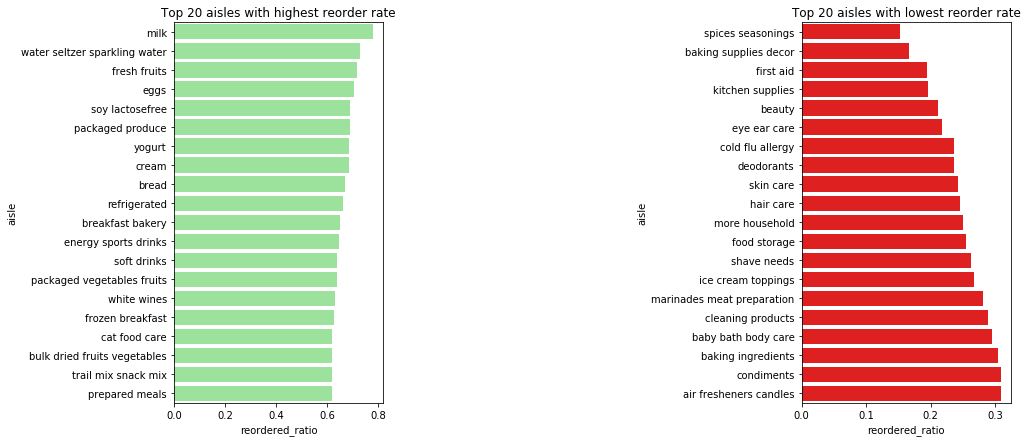

In [45]:
fig, ax =plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 7]
bar1 = sns.barplot(y= "aisle",  x="reordered_ratio", data=top20_aisles, color='lightgreen',ax=ax[0]).set(title='Top 20 aisles with highest reorder rate')
bar2 = sns.barplot(y= "aisle",  x="reordered_ratio", data=bot20_aisles, color='red',ax=ax[1]).set(title='Top 20 aisles with lowest reorder rate')
fig.subplots_adjust(hspace=0.2, wspace=2)
fig.show()


This gives us a clear image on the aisles that contain the most reordered products. Let's dive even deeper and try and find more about the specific products.

In [35]:
reordered_prod = df_order_products_prior_complete.groupby(['product_name'])['reordered'].agg(['count','sum']).reset_index()
reordered_prod.rename(columns = {'count':'total','sum':'reordered'}, inplace = True)
reordered_prod.sort_values(by='total', ascending = False, inplace = True)

reordered_prod_top25 = reordered_prod.head(25)

Text(0.5, 1.0, '25 Most ordered products')

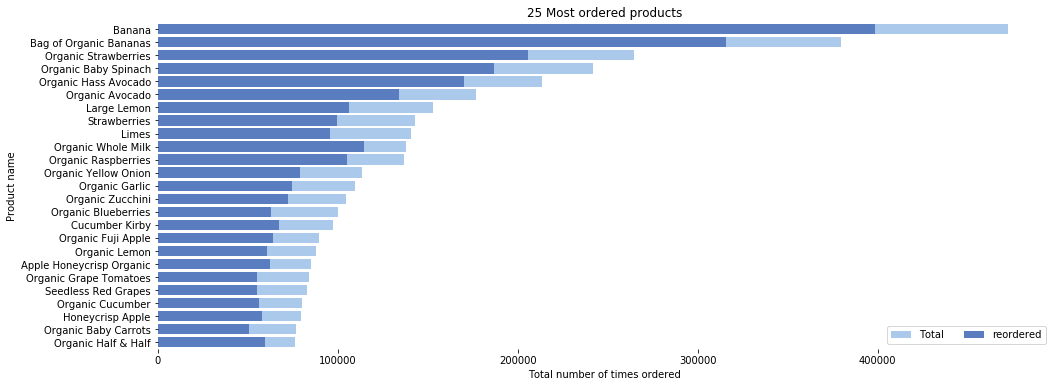

In [36]:
f, ax = plt.subplots(figsize=(16, 6))
sns.set_color_codes("pastel")
sns.barplot(x="total", y="product_name", data=reordered_prod_top25,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="reordered", y="product_name", data=reordered_prod_top25,
            label="reordered", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Product name",
       xlabel="Total number of times ordered")
sns.despine(left=True, bottom=True)
plt.title('25 Most ordered products')


We can clearly see that the most ordered products are re-ordered a lot. Lets now see the top when it comes to ratio of reording

In [37]:
reordered_prod['reorder_ratio'] = reordered_prod['reordered']/reordered_prod['total']
reordered_prod.sort_values(by = 'reorder_ratio', ascending = False, inplace = True)

reordered_prod25 = reordered_prod.head(25)

[Text(0, 0.5, 'Product name'), Text(0.5, 0, 'Re-oreder ratio')]

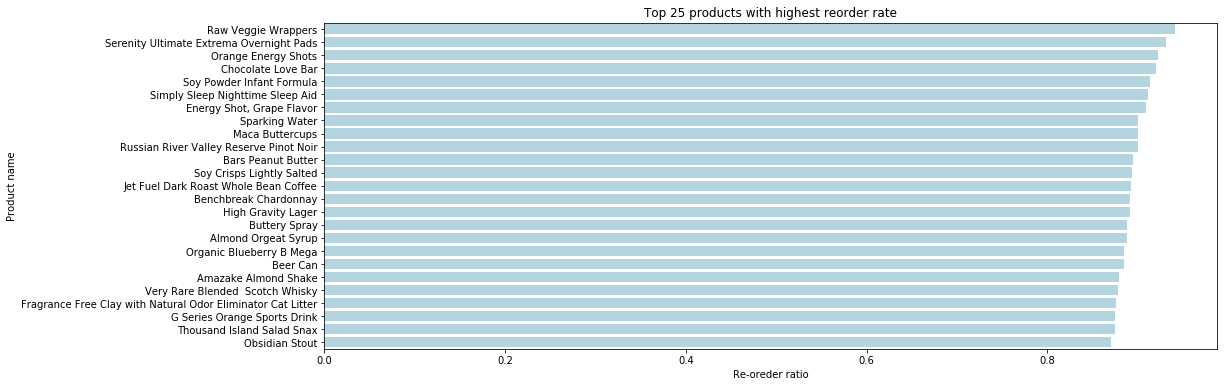

In [38]:
f, ax = plt.subplots(figsize=(16, 6))
bar1 = sns.barplot(y= "product_name",  x="reorder_ratio", data=reordered_prod25, color='lightblue').set(title='Top 25 products with highest reorder rate')
ax.set(ylabel="Product name",
       xlabel="Re-oreder ratio")

- The products are not the same in both lists but it is expectable. It is easier to have a higher ratio with a smaller total value. 

- Now, does the fact that a product has "organic" in its name influence if it is reordered?

In [39]:
reordered_org = df_order_products_prior_complete.groupby(['is_organic'])['reordered'].agg(['count','sum']).reset_index()
reordered_org.rename(columns = {'count':'total','sum':'reordered'}, inplace = True)

Text(0.5, 1.0, 'Reorders in relation to being organic VS non organic products')

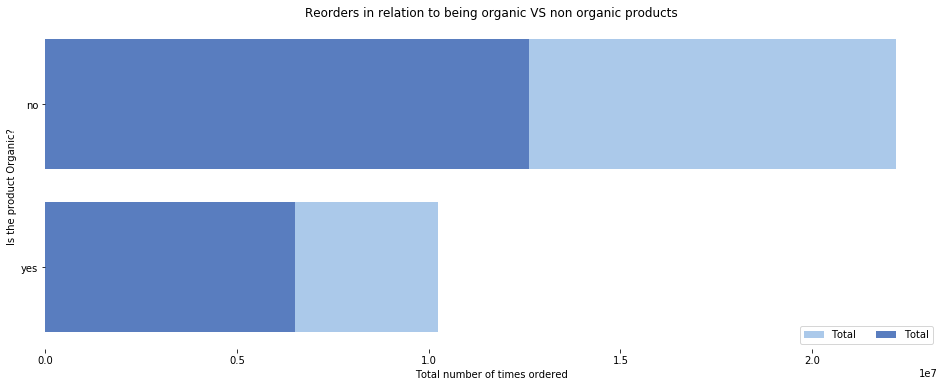

In [40]:
f, ax = plt.subplots(figsize=(16, 6))
sns.set_color_codes("pastel")
sns.barplot(x="total", y="is_organic", data=reordered_org ,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="reordered", y="is_organic", data=reordered_org ,
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Is the product Organic?",
       xlabel="Total number of times ordered")
sns.despine(left=True, bottom=True)
plt.title('Reorders in relation to being organic VS non organic products')

[Text(0, 0.5, 'Is the product Organic?'),
 Text(0.5, 0, 'Ratio of reordered by total number of times ordered')]

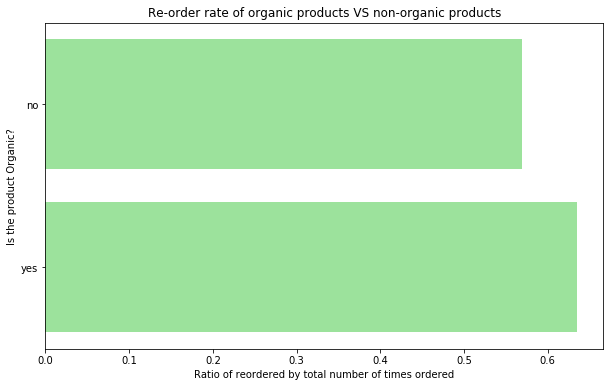

In [41]:
reordered_org['ratio'] = reordered_org['reordered']/reordered_org['total']

f, ax = plt.subplots(figsize=(10, 6))
bar1 = sns.barplot(y= "is_organic",  x="ratio", data=reordered_org, color='lightgreen').set(title= 'Re-order rate of organic products VS non-organic products')
ax.set(ylabel="Is the product Organic?",
       xlabel="Ratio of reordered by total number of times ordered")

Organic products have a higher reordered rate.

We are know trying to see if there is any type of connection between the order in which the customer put the product in the cart and the reordered rate.

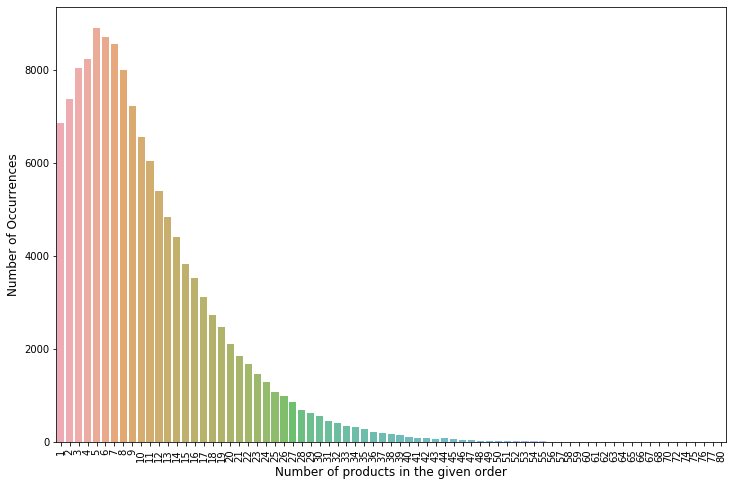

In [42]:
num_prod_order = df_order_products_train_complete.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count_n_prod = num_prod_order.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_n_prod.index, count_n_prod.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We obtained a right tailed distribution with the maximum value at 5! 

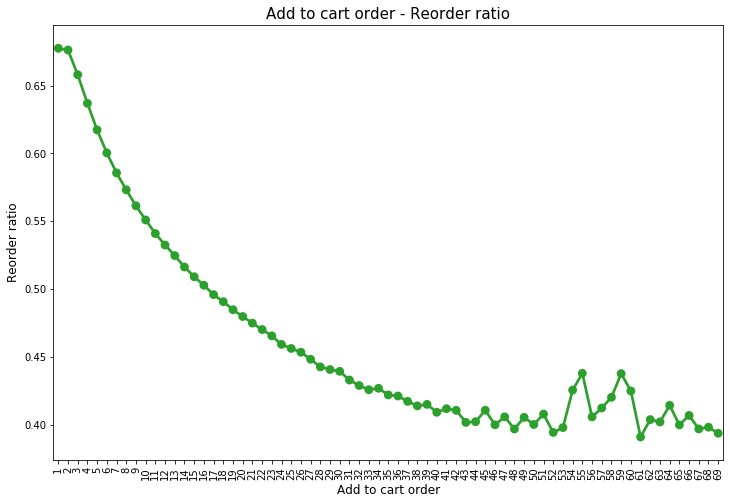

In [43]:
df_order_products_prior_complete["add_to_cart_order_mod"] = df_order_products_prior_complete["add_to_cart_order"].copy()
df_order_products_prior_complete[df_order_products_prior_complete["add_to_cart_order_mod"]>70] = 70
new_grouped_df = df_order_products_prior_complete.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()
new_grouped_df.drop(new_grouped_df.tail(1).index,inplace=True)

plt.figure(figsize=(12,8))
sns.pointplot(new_grouped_df['add_to_cart_order_mod'].values, new_grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

It looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. In fact it makes sense since normally people tend to first order all the products they are used to buy frequently and then look out for the new products available.

Now lets look if there is any relation between the hour of the day and the day of the week in which clients order products with reordered ratio.

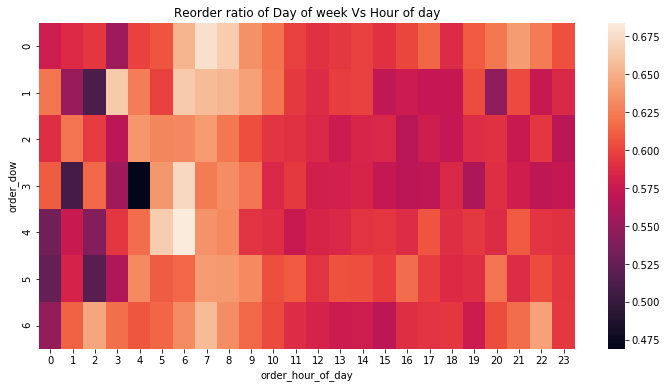

In [44]:
df_order_products_train_complete=df_order_products_train_complete.merge(df_orders, on='order_id', how='left')
new_grouped_df = df_order_products_train_complete.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
new_grouped_df = new_grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(new_grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

Reordered rates are quite high in the early morning, from 6 to 8 am, when comparing with the late afternoon. 

## Conclusion

We are now much more in touch with our data and the reality of our users.

- This analysis allowed us to understand that there are several levels that are important when trying to understand if a product is going to be reordered. It allowed us to find important features that we should use for our modelling phase. 

- We have understood that our customer tend to go shopping in the morning during the weekend. That most of them are weekly shoppers and usually buys less than 10 items. 

- In relation to the reordered variable, we concluded that it is related to the order in which the prooduct is addedd to the cart, and it is also related to the day and hour of the day in which the customer go shopping. 

The EDA was very useful for us to understand which variables are related and how our client behaves.


Go back to [Showcase notebook](Showcase.ipynb)